<a href="https://colab.research.google.com/github/ChenghenChen/AI-in-the-Built-Environment/blob/main/quickstarts/01_object_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/quickstarts/01_object_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> - Stasja's notebook

In [39]:
!git clone https://github.com/STASYA00/IAAC2024_tutorials
%cd IAAC2024_tutorials/quickstarts

Cloning into 'IAAC2024_tutorials'...
remote: Enumerating objects: 229, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 229 (delta 44), reused 73 (delta 38), pack-reused 142
Receiving objects: 100% (229/229), 94.43 MiB | 30.19 MiB/s, done.
Resolving deltas: 100% (103/103), done.
/content/IAAC2024_tutorials/quickstarts/IAAC2024_tutorials/quickstarts


In [40]:
import cv2
import matplotlib.pyplot as plt
import torch

from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
from torchvision.transforms.functional import to_pil_image
from torchvision.io import read_image

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

from google.colab.patches import cv2_imshow
# %matplotlib inline

## 🎯 Object Detection and Tracking

 ![Object Detection](https://raw.githubusercontent.com/STASYA00/IAAC2024_tutorials/main/.assets/out_tracker_x5.gif)

### 🫧 Object Detection. Yolo

[YOLO explained](https://medium.com/analytics-vidhya/yolo-explained-5b6f4564f31)\
[YOLO paper](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Redmon_You_Only_Look_CVPR_2016_paper.pdf)

In [41]:
model = torch.hub.load('ultralytics/yolov5', "yolov5l")

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-4-10 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 89.3M/89.3M [00:00<00:00, 262MB/s]

Fusing layers... 
YOLOv5l summary: 367 layers, 46533693 parameters, 0 gradients, 109.0 GFLOPs
Adding AutoShape... 


### ➰ Recap: object detection with an image

Let's try object detection on an image:

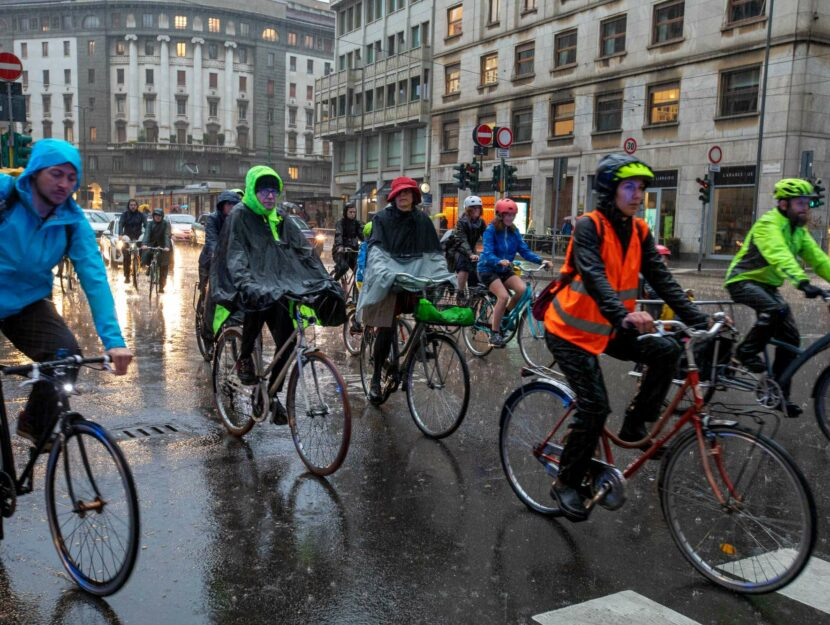

In [ ]:
img = cv2.imread("../.assets/cycles.jpg")
cv2_imshow(img)

In [ ]:
preds = model(img)
preds

WARNING ⚠️ NMS time limit 0.550s exceeded


YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 625x830 11 persons, 10 bicycles, 2 cars, 3 traffic lights, 2 backpacks
Speed: 22.5ms pre-process, 105.9ms inference, 912.3ms NMS per image at shape (1, 3, 512, 640)

How to read these predictions?

In [ ]:
type(preds)

models.common.Detections

In [ ]:
preds.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [ ]:
preds.xywh

[tensor([[6.57547e+02, 4.57019e+02, 3.19901e+02, 2.76336e+02, 9.32184e-01, 1.00000e+00],
         [6.34780e+02, 3.36604e+02, 1.85412e+02, 3.67219e+02, 9.19444e-01, 0.00000e+00],
         [7.07901e+01, 4.74884e+02, 1.41503e+02, 2.44116e+02, 9.15656e-01, 1.00000e+00],
         [2.81564e+02, 3.87410e+02, 1.42124e+02, 1.77617e+02, 8.96101e-01, 1.00000e+00],
         [7.76088e+02, 2.90250e+02, 1.07824e+02, 2.24174e+02, 8.91983e-01, 0.00000e+00],
         [4.05272e+02, 2.89739e+02, 9.90264e+01, 2.27900e+02, 8.65605e-01, 0.00000e+00],
         [6.63869e+01, 3.21556e+02, 1.32758e+02, 3.66906e+02, 8.53409e-01, 0.00000e+00],
         [5.08854e+02, 3.14418e+02, 9.17929e+01, 1.09049e+02, 8.40631e-01, 1.00000e+00],
         [2.77718e+02, 2.85883e+02, 1.31564e+02, 2.43320e+02, 8.26409e-01, 0.00000e+00],
         [5.14262e+02, 2.69880e+02, 7.54546e+01, 1.45059e+02, 8.24266e-01, 0.00000e+00],
         [4.11565e+02, 3.68032e+02, 1.19965e+02, 1.42573e+02, 8.14521e-01, 1.00000e+00],
         [7.65879e+02

#### 🪸 Visualizing results on our image with opencv

In [ ]:
CATEGORY = 0  # category person
CONFIDENCE = 0.1  # how confident the model is about this prediction, from 0 to 1

preds = preds.xywh[0]
preds = preds[preds[:, -1]==CATEGORY]
preds = preds[preds[:, -2]>=CONFIDENCE]

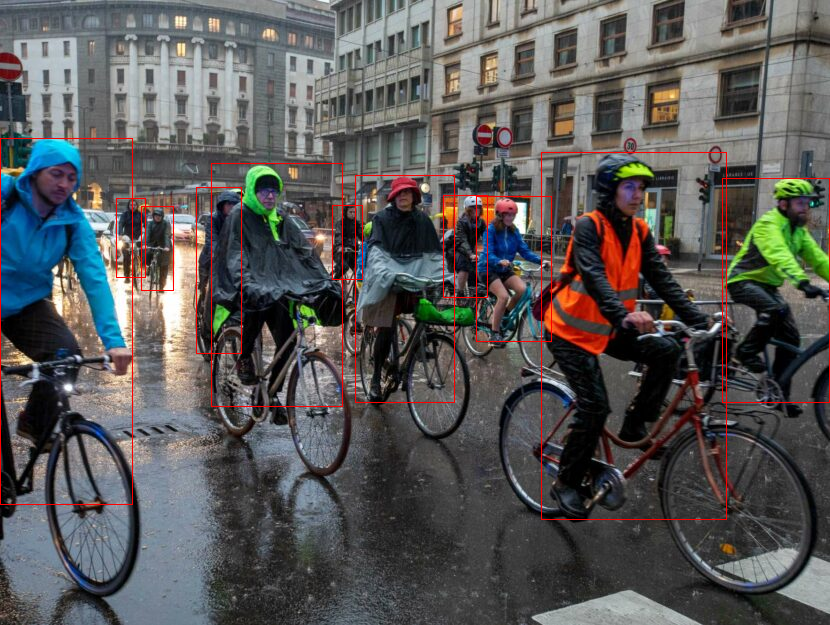

In [ ]:
color = (0,0,255)  # red frames
for pred in preds:
    # for every prediction in model's results
    # we get x,y,w,h, where
    # x,y - coordinates of the center of the bounding box
    # w,h - width and height of the bounding box

    x, y, w, h = [int(p) for p in pred[:4]]

    # calculate the top left and bottom right angles of the box
    x1 = int(x - 0.5 * w)
    y1 = int(y - 0.5* h)
    x2 = int(x + 0.5 * w)
    y2 = int(y + 0.5* h)

    # draw the box
    img = cv2.rectangle(img, (x1,y1), (x2, y2), color, 1)

cv2_imshow(img)

### 🧩 Tracking people activity on Stockholm's main square

We have several videos capturing movement of people on [Sergels Torg](https://sv.wikipedia.org/wiki/Sergels_torg) in Stockholm. To analyze the square we want to see how the number of people changes with time, where the movement is concentrated and directed.

Let's start with reading one of the videos:

In [125]:
cap = cv2.VideoCapture('../.assets/4.mp4')

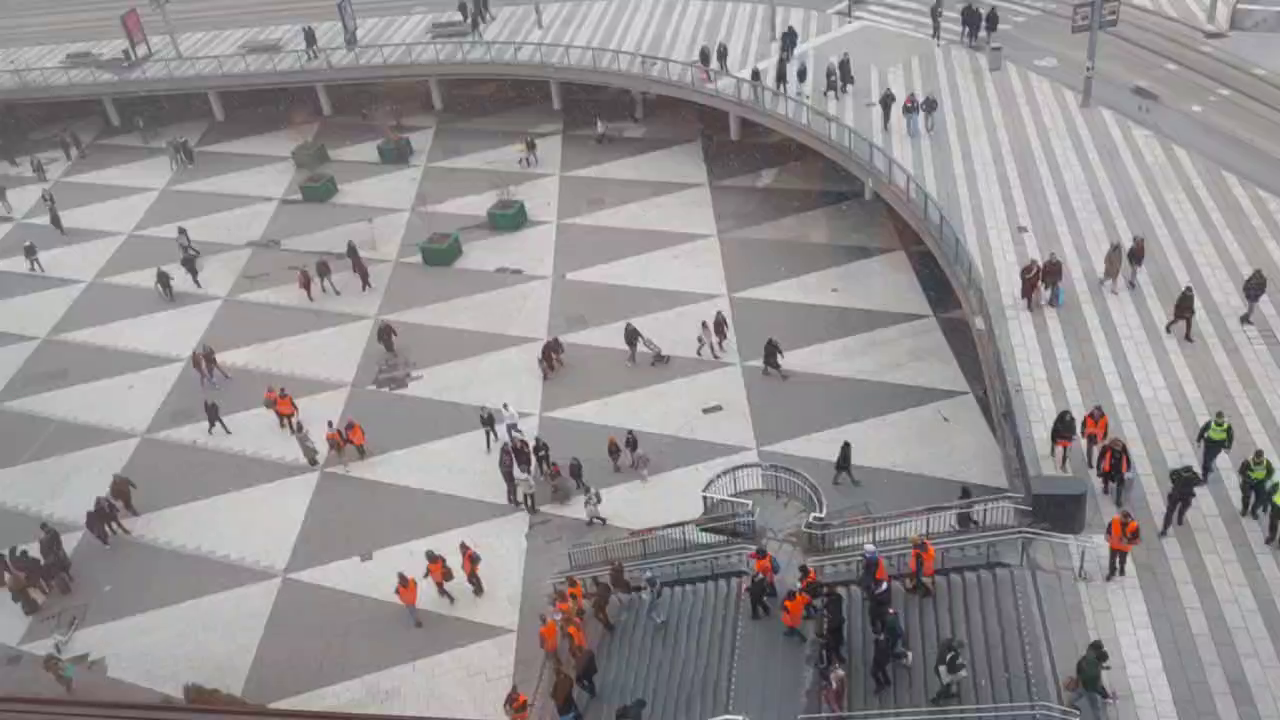

In [126]:
ret, frame = cap.read(0)  # 0 is the frame number
cv2_imshow(frame)

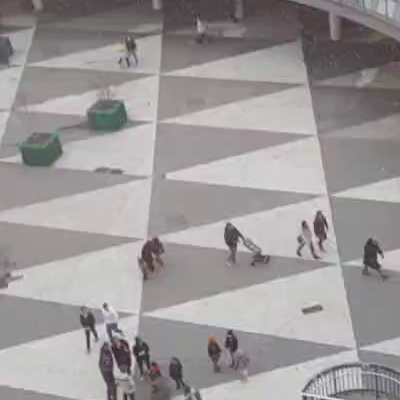

In [127]:
crop=frame[100:500,400:800]
cv2_imshow(crop)

In [129]:
preds = model(crop)
preds

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 400x400 19 persons
Speed: 9.3ms pre-process, 53.2ms inference, 15.0ms NMS per image at shape (1, 3, 640, 640)

In [130]:
CATEGORY = 0
CONFIDENCE = 0.5

In [131]:

preds = preds.xywh[0]
preds = preds[preds[:, -1]==CATEGORY]
preds = preds[preds[:, -2]>=CONFIDENCE]

Let's write all predictions to our image:

In [132]:
for pred in preds:
    x, y, w, h = [int(p) for p in pred[:4]]
    x1 = int(x - 0.5 * w)
    y1 = int(y - 0.5* h)
    x2 = int(x + 0.5 * w)
    y2 = int(y + 0.5* h)
    crop = cv2.rectangle(crop, (x1,y1), (x2, y2), (0,0,255), 1)


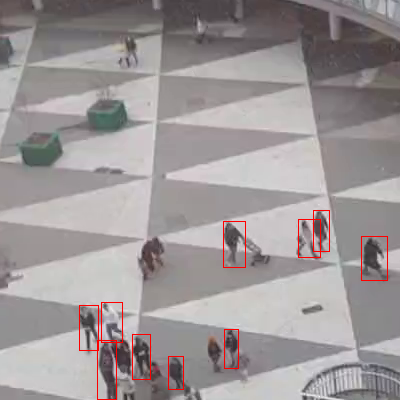

In [133]:
cv2_imshow(crop)

🧩 What are the challenges or limitations of the model that you can observe?

Looping through the entire video:

In [134]:
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(total_frames)

1767


Let's count the amount of detected people per frame:

In [135]:
ppl_density = []
for f in range(total_frames):
    ret, crop = cap.read(f)
    if ret == True:
        preds = model(crop)
        preds = preds.xywh[0]
        preds = preds[preds[:, -1]==CATEGORY]
        preds = preds[preds[:, -2]>=CONFIDENCE]
        ppl_density.append(len(preds))


In [136]:
len(ppl_density)

1766

In [137]:
sns.lineplot(ppl_density)

<Axes: >

Let's write a function to draw predictions on a frame:

In [139]:
def draw_predictions(crop, predictions, color = (255,255,255)):
    """
    Function to draw bounding boxes from predictions on the given image.
    :param: frame           image to draw the boxes on, np.ndarray, (h, w, ch)
    :param: predictions     predictions to draw, torch.tensor
    :param: color           color to use for bounding box outline rgb, tuple, default (255,255,255)
    """
    for pred in predictions:
        x, y, w, h = [int(p) for p in pred[:4]]
        x1 = int(x - 0.5 * w)
        y1 = int(y - 0.5* h)
        x2 = int(x + 0.5 * w)
        y2 = int(y + 0.5* h)
        crop = cv2.rectangle(crop, (x1,y1), (x2, y2), color, 1)
    return crop

writing down a modified video:

In [140]:
cap = cv2.VideoCapture('../.assets/4.mp4')
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
out = cv2.VideoWriter('outpy.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width, frame_height))


In [141]:
for f in range(total_frames):
    ret, crop = cap.read(f)
    if ret == True:
        preds = model(crop)
        preds = preds.xywh[0]
        preds = preds[preds[:, -1]==CATEGORY]
        preds = preds[preds[:, -2]>=CONFIDENCE]
        ppl_density.append(len(preds))
        crop = draw_predictions(crop, preds)
        out.write(crop)

cap.release()
out.release()

In [142]:
cap = cv2.VideoCapture('../.assets/4.mp4')
out = cv2.VideoWriter('../.assets/out_short.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width, frame_height))

font = cv2.FONT_HERSHEY_SIMPLEX
ppl_density = []

for f in range(1000):
    ret, crop = cap.read(f)
    if ret == True:
        preds = model(crop)
        preds = preds.xywh[0]
        preds = preds[preds[:, -1]==CATEGORY]
        preds = preds[preds[:, -2]>=CONFIDENCE]
        ppl_density.append(len(preds))
        crop = draw_predictions(crop, preds)
        crop = cv2.putText(crop, 'People: {}'.format(len(preds)),
                            (50, 50), font,
                            1, (255,255,255), 2, cv2.LINE_AA)
        out.write(crop)

cap.release()
out.release()

### ✨ Convert the video in mp4 format:

[ffmpeg](https://www.ffmpeg.org/)

In [143]:
!ffmpeg -i ../.assets/out_short.avi ../.assets/out_short.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

And speed it up:

In [144]:
!ffmpeg -i ../.assets/out_short.mp4 -vf  "setpts=0.20*PTS" ../.assets/out_short_x5.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

## 🫧 Tracking

[Object Tracking](https://viso.ai/deep-learning/object-tracking/)\
[DeepSort](https://www.ikomia.ai/blog/deep-sort-object-tracking-guide)

In [145]:
%cd ../
!git clone https://github.com/STASYA00/deep_sort.git
%cd deep_sort
%pip install -r requirements.txt
%cd ../quickstarts

/content/IAAC2024_tutorials/quickstarts/IAAC2024_tutorials
Cloning into 'deep_sort'...
remote: Enumerating objects: 284, done.
remote: Counting objects: 100% (284/284), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 284 (delta 80), reused 268 (delta 70), pack-reused 0
Receiving objects: 100% (284/284), 19.45 MiB | 25.28 MiB/s, done.
Resolving deltas: 100% (80/80), done.
/content/IAAC2024_tutorials/quickstarts/IAAC2024_tutorials/deep_sort
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00
 

/content/IAAC2024_tutorials/quickstarts/IAAC2024_tutorials/quickstarts


In [ ]:
%cd ../deep_sort/
!git pull
%cd ../quickstarts/

In [ ]:
import sys
sys.path.append("..")

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from deep_sort.deep_sort import DeepSort

In [ ]:
tracker = DeepSort("osnet_x0_25")

Successfully loaded imagenet pretrained weights from "/root/.cache/torch/checkpoints/osnet_x0_25_imagenet.pth"


In [ ]:
def yolo2standard(xyxy) -> list:
    """
    Function that brings yolo bbox xyxy annotation to standard format [left, top, w, h]
    """
    w = xyxy[2] - xyxy[0]
    h = xyxy[3] - xyxy[1]
    return [xyxy[0], xyxy[1],w, h]



In [ ]:
def draw_labeled_predictions(frame, predictions, label, color = (255,255,255)):
    """
    Function to draw bounding boxes from predictions on the given image.
    :param: frame           image to draw the boxes on, np.ndarray, (h, w, ch)
    :param: predictions     predictions to draw, torch.tensor
    :param: color           color to use for bounding box outline rgb, tuple, default (255,255,255)
    """
    for pred in predictions:
        x1, y1, w, h = [int(p) for p in pred[:4]]
        x2 = int(x1 + w)
        y2 = int(y1 + h)
        frame = cv2.rectangle(frame, (x1,y1), (x2, y2), color, 1)
        frame = cv2.putText(frame, 'People: {}'.format(label),
                            (x1 + 10, y1 + 10), font,
                            1, (255,255,255), 2, cv2.LINE_AA)
    return frame

Looping over the video:

In [ ]:
total_frames = 2000
CONFIDENCE = 0.1

In [ ]:
cap = cv2.VideoCapture('../.assets/1.mp4')
out = cv2.VideoWriter('../.assets/out_tracker.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width, frame_height))

font = cv2.FONT_HERSHEY_SIMPLEX
seen_people = []


for f in range(total_frames):
    ret, frame = cap.read(f)
    if ret == True:
        preds = model(frame)
        preds = preds.xywh[0]
        preds = preds[preds[:, -1]==CATEGORY]
        preds = preds[preds[:, -2]>=CONFIDENCE]

        preds = tracker.update(preds[:, :4].cpu(), preds[:,4].cpu(), preds[:,-1].cpu(), frame)

        # filter out predictions
        for r in preds:
            label = r[4]
            if not label in seen_people:
                seen_people.append(label)

            r = yolo2standard(r)
            frame = draw_labeled_predictions(frame, [r[:4]], label)
        out.write(frame)

cap.release()
out.release()

In [ ]:
!ffmpeg -i ../.assets/out_tracker.avi ../.assets/out_tracker.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!ffmpeg -i ../.assets/out_tracker.mp4 -vf  "setpts=0.20*PTS" ../.assets/out_tracker_x5.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!ffmpeg -ss 0 -t 30 -i ../.assets/out_tracker_x5.mp4 \
    -vf "fps=30,scale=720:-1:flags=lanczos" \
    -loop 0 ../.assets/out_tracker_x5.gif

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab